# Ajuste de una recta con emcee

Seguimos el ejemplo mostrado en http://dfm.io/emcee/current/user/line/ para ajustar una recta a un conjunto de datos cuando no confiamos en las barras de error de éstos.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from pylab import rcParams
import emcee

rcParams['figure.figsize'] = (10, 6)

In [10]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerror = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerror * np.random.randn(N)

La siguiente gráfica muestra los datos a ajustar junto con sus barras de error. La recta azul muestra el modelo real al que debería aproximarse nuestro ajuste.

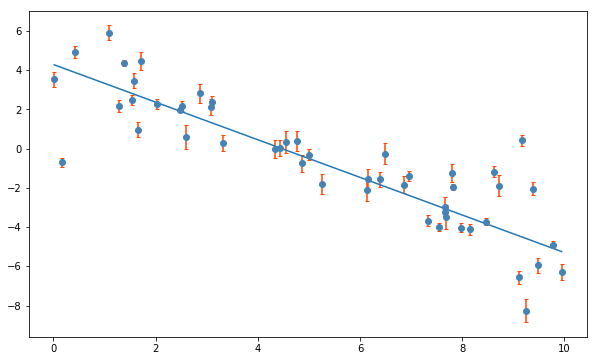

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(x, y, yerr = yerror, fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

def true_model(x):
    return m_true * x + b_true

true_vect = np.vectorize(true_model)

plt.plot(x, true_vect(x))

Un ajuste por mínimos cuadrados arroja el siguiente resultado, el cual aparece en la gráfica como una línea punteada negra:

In [14]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

print 'm =', m_ls, 'b =', b_ls

m = -0.8605056222212064 b = 3.810340152701027


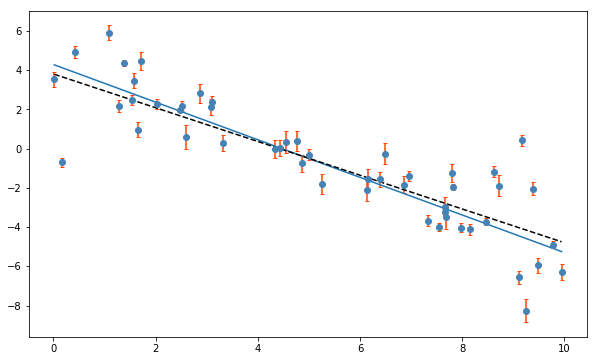

In [16]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.errorbar(x, y, yerr = yerror, fmt = 'o', ecolor = 'orangered',
            color = 'steelblue', capsize = 2)
plt.plot(x, true_vect(x))

def lls_model(x):
    return m_ls * x + b_ls

lls_vect = np.vectorize(lls_model)

plt.plot(x, lls_vect(x), '--', color = 'black')

Ahora vamos a ajustar maximizando el likelihood.

In [18]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

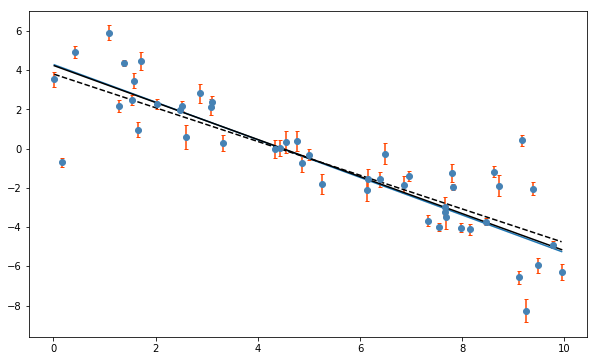

In [19]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.errorbar(x, y, yerr = yerror, fmt = 'o', ecolor = 'orangered',
            color = 'steelblue', capsize = 2)
plt.plot(x, true_vect(x))
plt.plot(x, lls_vect(x), '--', color = 'black')

def maxlike_model(x):
    return m_ml * x + b_ml

ml_vect = np.vectorize(maxlike_model)

plt.plot(x, ml_vect(x), color = 'black')